Данная работа посвящена отработке навыков использования методов эмбединга узлов графа, на примере социального графа, полученного из социальной сети. Социальный граф, который используется для отработки, представляет участников ЛОКАЛЬНОГО (регионального) спортивного сообщества с открытым входом, это значит, что в данное сообщество могли вступать любые пользователи социальной сети.

Социальный граф предварительно был очищен от случайных пользователей. Разметка пользователей сделана по ролям: Организатор, тренер, Спортмен-pro (проф. спортсмен), Спортсмен-любитель, Активный участник, спортсмен из другого региона.
____
This work is devoted to the development of skills in using **embedding methods** of graph nodes, using the example of a social graph obtained from a social network. The social graph, which is used for testing, represents the participants of the LOCAL (regional) sports community with an open entrance, which means that any users of the social network could join this community.

The social graph was previously cleared of random users. The user markup is made by roles: Organizer, coach, Sportman-pro (prof. athlete), Amateur athlete, Active participant, athlete from another region.

In [ ]:
#connecting libraries
import networkx #graph

import random
from random import randint

from gensim.models import Word2Vec #word2vec
import warnings

#dimensionality reduction for visualization
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#file upload
from google.colab import files
uploaded = files.upload()
#the data from the file is converted into a graph
G = networkx.readwrite.graphml.read_graphml("Filtered_graph.graphml")
G

**1.** Visualize the graph (gephi/cytoscape package). 

**2.** Estimation of the main parameters of graph nodes - centrality metrics, diameter, density, page rank, modularity. 

**3.** Coloring of graph nodes by modularity. 

**4.** Defining groups within a community by modularity

**Step 1**

We define a **function** that performs random walks on the graph G. 

The parameters are passed, the ID of the starting node, and the length of the list of random walks, 

G - graph

node - id of the starting node

t is the number of steps in each walk.

The output of the function is an array consisting of chains (arrays) of random walks.

In [ ]:
# path_lengh - corresponds to the parameter t
def get_randomwalk(G, node, t):
    
    random_walk = [node]
    #print ('Start with the node', random_walk)
    for i in range(t -1):
        temp = list(G.neighbors(node))
        # print('Neighbors', temp)
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

Next, we implement a given number of random walks for each node of the graph. 

This number is set in the gamma variable.

tqdm to track the progress of the cycle.

In [ ]:
from tqdm import tqdm 
import random 

all_nodes = list(G.nodes())
gamma = 80
t = 80
random_walks = []
for n in tqdm(all_nodes):
  for i in range (gamma):
    random_walks.append(get_randomwalk(G, n, t))

#count random walks
len(random_walks)

NameError: ignored

Next, we will train the algorithm on the formed chains of random walks. 

word2vec method to do this, we use the algorithm already implemented in the gensim library. 

 Function Parameters:

 window - window size

 sg = 1 - this means the skipgrapm model will be used


hs {0, 1}, optional parameter) – If 1, hierarchical softmax will be used, if 0 - negative sampling.

alpha - initial(start) value;

min_alpha - algorithm stop condition;

seed - random seed. (value 14 when doing work)

In [ ]:
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = Word2Vec(window = 10, sg = 1, hs = 0, batch_words=3000,
                 negative = 10, #for negative sampling
                 alpha=0.03, min_alpha=0.005,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

model.train(random_walks, total_examples = model.corpus_count, epochs=3, report_delay=1)

(20635, 86100)

In [ ]:
model[model.wv.vocab] #embeddings

array([[-9.14424658e-03,  1.63128331e-01, -1.77658170e-01, ...,
        -5.45452200e-02, -4.90961969e-02,  4.75132726e-02],
       [ 8.53980018e-05,  1.40428811e-01, -1.34489611e-01, ...,
        -3.21474075e-02, -5.17409593e-02,  6.07034117e-02],
       [-1.28238695e-02,  1.35084897e-01, -1.27137467e-01, ...,
        -1.62618831e-02, -4.16153520e-02,  3.10536399e-02],
       ...,
       [-1.52232638e-02,  4.39340696e-02, -1.15499772e-01, ...,
         2.74484921e-02,  3.07556894e-02, -6.30137101e-02],
       [-1.78411473e-02,  3.85010019e-02, -1.07908867e-01, ...,
         4.24115136e-02,  3.02005298e-02, -7.45572001e-02],
       [-1.83634423e-02,  1.18662929e-02, -1.01608701e-01, ...,
         5.52928969e-02,  3.87490839e-02, -9.01922286e-02]], dtype=float32)

We output embeds of nodes of the graph

In [ ]:
import numpy as np
X = model[model.wv.vocab] #embeddings
model.wv.vocab #the keys themselves are node numbers

{'0': <gensim.models.keyedvectors.Vocab at 0x7fed47e81190>,
 '8': <gensim.models.keyedvectors.Vocab at 0x7fed4f2f2b10>,
 '10': <gensim.models.keyedvectors.Vocab at 0x7fed4f2eb290>,
 '7': <gensim.models.keyedvectors.Vocab at 0x7fed4f304810>,
 '9': <gensim.models.keyedvectors.Vocab at 0x7fed4f3045d0>,
 '5': <gensim.models.keyedvectors.Vocab at 0x7fed4f304250>,
 '23': <gensim.models.keyedvectors.Vocab at 0x7fed4f304ed0>,
 '26': <gensim.models.keyedvectors.Vocab at 0x7fed47e7efd0>,
 '25': <gensim.models.keyedvectors.Vocab at 0x7fed4f304310>,
 '24': <gensim.models.keyedvectors.Vocab at 0x7fed4f304910>,
 '27': <gensim.models.keyedvectors.Vocab at 0x7fed47e7ef90>,
 '22': <gensim.models.keyedvectors.Vocab at 0x7fed47e7ef50>,
 '1': <gensim.models.keyedvectors.Vocab at 0x7fed47e7eed0>,
 '17': <gensim.models.keyedvectors.Vocab at 0x7fed47e7ee10>,
 '21': <gensim.models.keyedvectors.Vocab at 0x7fed47e7edd0>,
 '18': <gensim.models.keyedvectors.Vocab at 0x7fed47e7ee50>,
 '20': <gensim.models.keyedvec

In order to visually evaluate the result - use the methods of reducing the dimensions of PCA and T-SNE. 

Naturally, when the number of measurements is reduced to 2x, information is lost, but using these methods is a good way to evaluate the results if necessary.

In [ ]:
# libraries
#from random import randint
#from sklearn.manifold import TSNE

# ----- Function Parameters -----------------------
#labels - cluster labels
#node_list- ids of graph nodes list
#X_embedding - feature description of each object (matrix) 
#annotate - whether to display the signatures of node names on the graph
#annotate_labes  - dictionary with node names
def plot_nodes(node_list, X_embedding, labels = [], annotate = False, annotate_labes = {}):
    X = X_embedding

    #цвет, при отсутствии меток кластера
    colors = ['#6495ED' for i in node_list]
    map={}
    #если метки кластера в наличии, то случайно выбираем цвета
    if len(labels) != 0:
       for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
       colors = [map[i] for i in labels]
    
    # we reduce the dimension to 2x
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    

    
    plt.figure(figsize=(6,3))
    # create a scatter plot of the projection

    plt.scatter(result[:, 0], result[:, 1],  c=colors)
    for i, node in enumerate(node_list):
         if (annotate_labes[node] !='-' and annotate ==True):
          plt.annotate(annotate_labes[node], xy=(result[i, 0], result[i, 1]))
    
    plt.show()
 

In [ ]:
def plot_TSNE_nodes(node_list, X_embedding, labels = [], annotate = False, annotate_labes = {}):

    colors = ['#6495ED' for i in node_list]
    map={}
    if len(labels) != 0:
      for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
      colors = [map[i] for i in labels]
    X = X_embedding

    tsne = TSNE(n_components=2, verbose=0, perplexity=7)
    tsne_results = tsne.fit_transform(X)

    plt.figure(figsize=(9,6))
    # create a scatter plot of the projection
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c = colors)
    for i, node in enumerate(node_list):
        if (annotate_labes[node] !='-' and annotate ==True):
          plt.annotate(annotate_labes[node], xy=(tsne_results[i, 0], tsne_results[i, 1]))
    plt.show()

In [ ]:
#### BOTH GRAPHS ARE FOR COMPARISON ---------------------------
def plot_TSNE_PCA_nodes(node_list, X_embedding, labels = [], annotate = False, annotate_labes = {}):

    colors = ['#6495ED' for i in node_list]
    map={}
    if len(labels) != 0:
      for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
      colors = [map[i] for i in labels]
    X = X_embedding
    tsne = TSNE(n_components=2, verbose=0, perplexity=7)
    #perpexity	The degree of chaos, which indicates how many neighboring points are taken into account when optimizing t-SNE,
    # 30 by default, and the recommended value is from 5 to 50
    tsne_results = tsne.fit_transform(X)

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X)
    
    f, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(pca_result[:, 0], pca_result[:, 1],  c=colors)
    ax[0].set_title('PCA Cluster Plot')

    ax[1].scatter(tsne_results[:, 0], tsne_results[:, 1], c = colors)
    ax[1].set_title('TSNE Cluster Plot') 
    plt.show()

In [ ]:
#node labels in the graph dictionary
list_labels ={}
for node in G.nodes:
  list_labels[node]=G.nodes[node]['label']

list_labels  


{'0': 'Главный тренер-группа pro',
 '1': 'Тренер - группа любители, организатор 1',
 '2': 'Организатор 2',
 '3': 'Организатор 3(Дох)',
 '4': 'Спортивный врач-физиотерапевт',
 '5': 'Спортсмен-pro-1',
 '6': 'Спортсмен-pro-2',
 '7': 'Спортсмен-pro-3',
 '8': 'Спортсмен-pro-4',
 '9': 'Спортсмен-pro-5',
 '10': 'Спортсмен-pro-6',
 '11': 'Спортсмен-любитель 1',
 '12': 'Спортсмен-любитель 2',
 '13': 'Спортсмен-любитель 3',
 '14': 'Спортсмен-любитель 4',
 '15': 'Спортсмен-любитель 5',
 '16': 'Спортсмен-любитель 6',
 '17': 'Спортсмен-любитель 7',
 '18': 'Спортсмен-любитель 8',
 '19': 'Спортсмен-любитель 9',
 '20': 'Спортсмен-любитель 10',
 '21': 'Спортсмен-любитель 11',
 '22': 'Спортсмен-другой регион 1',
 '23': 'Спортсмен-другой регион 2',
 '24': 'Спортсмен-другой регион 3',
 '25': 'Спортсмен-другой регион 4',
 '26': 'Спортсмен-другой регион 5',
 '27': 'Тренер спортсменов др. регион',
 '28': 'Активный-участник 1',
 '29': 'Активный-участник 2',
 '30': 'Активный-участник 3',
 '31': 'Активный-участ

The similar_by_word function allows you to find similar graph nodes based on the resulting vector representation of graph nodes. The measure of similarity is the cosine proximity between vectors. By default, it will return the 10 most similar nodes.

Similarity function - returns the value of proximity between vectors (cosine similarity)

In [ ]:
#example
similar = model.wv.similar_by_word('1')
print("Nodes similar to 0", similar)
print("Cosine measure of similarity between nodes 0 и 27 = ", model.wv.similarity('0', '27')) #the node is similar to itself, the cosine measure should be = 1
similar1 = model.wv.similar_by_word('27')
print("Nodes similar to 27", similar1)
print("Cosine measure of similarity between nodes 1 и 27 = ", model.wv.similarity('1', '27')) #the node is similar to itself, the cosine measure should be = 1

Nodes similar to 0 [('16', 0.9789484143257141), ('21', 0.9788088798522949), ('12', 0.9782329797744751), ('13', 0.9745197296142578), ('15', 0.9704200625419617), ('11', 0.9674797654151917), ('17', 0.9664049744606018), ('14', 0.9657437205314636), ('19', 0.9648654460906982), ('20', 0.9625815749168396)]
Cosine measure of similarity between nodes 0 и 27 =  0.9933231
Nodes similar to 27 [('24', 0.9980704188346863), ('26', 0.9962289333343506), ('3', 0.9959617853164673), ('25', 0.9958141446113586), ('22', 0.9953219294548035), ('23', 0.995158851146698), ('7', 0.9934976696968079), ('0', 0.9933230876922607), ('8', 0.992276132106781), ('9', 0.9882630705833435)]
Cosine measure of similarity between nodes 1 и 27 =  0.6773457


In [ ]:
# how to view nodes that are similar to the given one 
# in similar - nodes similar to 1 nodes - 10 nodes by default
for i in range(len(similar)):
  print(G.nodes[similar[i][0]]['label'])
print(len(similar))
print('--------------------')
for i in range(len(similar)):
  print (G.nodes[similar1[i][0]]['label'])
similar = model.wv.similar_by_word('1')

Спортсмен-любитель 6
Спортсмен-любитель 11
Спортсмен-любитель 2
Спортсмен-любитель 3
Спортсмен-любитель 5
Спортсмен-любитель 1
Спортсмен-любитель 7
Спортсмен-любитель 4
Спортсмен-любитель 9
Спортсмен-любитель 10
10
--------------------
Спортсмен-другой регион 3
Спортсмен-другой регион 5
Организатор 3(Дох)
Спортсмен-другой регион 4
Спортсмен-другой регион 1
Спортсмен-другой регион 2
Спортсмен-pro-3
Главный тренер-группа pro
Спортсмен-pro-4
Спортсмен-pro-5


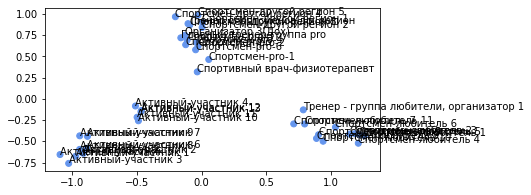

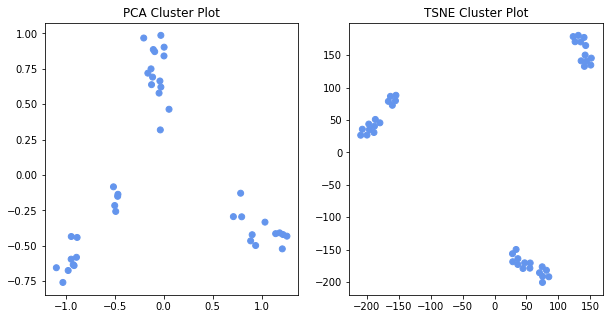

In [ ]:
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt
#%matplotlib inline

plot_nodes(node_list = list(model.wv.vocab), X_embedding=X, annotate=True, annotate_labes=list_labels)
plot_TSNE_PCA_nodes(node_list = list(model.wv.vocab), X_embedding=X, annotate=True, annotate_labes=list_labels)

In order to form an idea of the similarity groups within the analyzed social graph, a cluster analysis will be performed **using 3 methods**. 


* DB-scan is a method that allows you to work with noise.
* Affinity propagation - the method will allow you to detect many clusters
* K-medoids

Depending on the chosen similarity metric, it may be necessary to normalize the features of objects. For example, when using the Euclidean distance, such normalization is required so that the features have equal weight when performing cluster analysis. 

When using cosine similarity, such normalization is not performed. 

The following shows how the data is normalized if it needs to be done.

In [ ]:
#from sklearn import preprocessing
#scaler  = preprocessing.StandardScaler().fit(X)

#X_scaled = scaler.transform(X)

**DB Scan**

Use cosine distance, not cosine similarity, because not all clustering methods can work with negative distances (distances). Use eps = 0.09 and set min_samples: 3. (The minimum number of neighbors that a given point must have in order to be classified as a center point. It should be noted that the point itself is included in the minimum number of samples.)

In [ ]:
#the function outputs the composition of clusters
#lab = cluster labels
#G - graph

def print_clusters(lab, G, list_nodes):
  for c in list(set(lab)):
    print('CLUSTER ', c, '-----------')
    j=0
    t=0
    for i in range(len(lab)):
      if lab[i]==c:
        t = t +1
        itm = list_nodes[i]
        if G.nodes[itm]['label'] != '-':
          print (G.nodes[itm]['label'], ', id-', itm)
        else:
          j = j + 1
    print ("Неразмеченных -", j)
    print ("ВСЕГО в кластере  -", t)       

In [ ]:
## dbscan with cosine distance
from sklearn.cluster import DBSCAN
import numpy as np
import sklearn
#X = model[model.wv.vocab]
CosDist = sklearn.metrics.pairwise.cosine_distances(X,X)

#можно двумя способами сделать
db = DBSCAN(metric="precomputed", eps=0.5, min_samples=2).fit(CosDist) 
db = DBSCAN( metric='cosine', eps=0.05, min_samples=2).fit(X)
db.labels_

#оценка сколько получилось кластеров и сколько объектов отмечено как шумовых
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)
print("кластеров - ", n_clusters_, ", шум ", n_noise_, ", всего ", len(db.labels_) , ", метки кластеров", set(db.labels_))

print_clusters(db.labels_, G, list(model.wv.vocab)) 

кластеров -  3 , шум  0 , всего  41 , метки кластеров {0, 1, 2}
CLUSTER  0 -----------
Главный тренер-группа pro , id- 0
Спортсмен-pro-4 , id- 8
Спортсмен-pro-6 , id- 10
Спортсмен-pro-3 , id- 7
Спортсмен-pro-5 , id- 9
Спортсмен-pro-1 , id- 5
Спортсмен-другой регион 2 , id- 23
Спортсмен-другой регион 5 , id- 26
Спортсмен-другой регион 4 , id- 25
Спортсмен-другой регион 3 , id- 24
Тренер спортсменов др. регион , id- 27
Спортсмен-другой регион 1 , id- 22
Спортсмен-pro-2 , id- 6
Спортивный врач-физиотерапевт , id- 4
Организатор 3(Дох) , id- 3
Неразмеченных - 0
ВСЕГО в кластере  - 15
CLUSTER  1 -----------
Тренер - группа любители, организатор 1 , id- 1
Спортсмен-любитель 7 , id- 17
Спортсмен-любитель 11 , id- 21
Спортсмен-любитель 8 , id- 18
Спортсмен-любитель 10 , id- 20
Спортсмен-любитель 9 , id- 19
Спортсмен-любитель 4 , id- 14
Спортсмен-любитель 3 , id- 13
Спортсмен-любитель 5 , id- 15
Спортсмен-любитель 2 , id- 12
Спортсмен-любитель 6 , id- 16
Спортсмен-любитель 1 , id- 11
Неразмеченн

The elbow method allows you to determine the optimal number of clusters for the k-means method. It can be seen that even using the Euclidean distance instead of the recommended cosine by the elbow method, a successful solution is to split the source objects into 3 clusters.

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


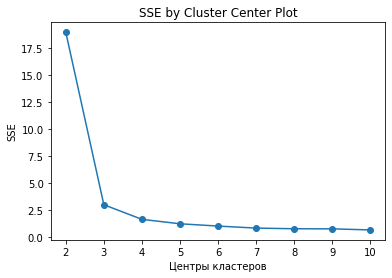

In [ ]:
#using batch processing , you can calculate optimal number of clusters
#however, with such processing, it is not possible to calculate the distance measure yourself
#However, we use it in this form and make an "estimate" to determine the optimal number of clusters by the Elbow method
from sklearn.cluster import MiniBatchKMeans
#optimal number of clusters
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Центры кластеров')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 10)


We perform cluster analysis using the k-means method. The implementation of k-means in the scikit-learn library does not allow working with metrics other than Euclidean because the average value is not a good estimate of cluster centers in non-Euclidean space. In this case, an alternative k-medoids method is used. 

In this paper, cluster analysis will be performed using the kmeans method with Euclidean distance and then k-medoids with cosine.

[0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 0 1
 1 1 1 1]
CLUSTER  0 -----------
Главный тренер-группа pro , id- 0
Спортсмен-pro-4 , id- 8
Спортсмен-pro-6 , id- 10
Спортсмен-pro-3 , id- 7
Спортсмен-pro-5 , id- 9
Спортсмен-pro-1 , id- 5
Спортсмен-другой регион 2 , id- 23
Спортсмен-другой регион 5 , id- 26
Спортсмен-другой регион 4 , id- 25
Спортсмен-другой регион 3 , id- 24
Тренер спортсменов др. регион , id- 27
Спортсмен-другой регион 1 , id- 22
Спортсмен-pro-2 , id- 6
Спортивный врач-физиотерапевт , id- 4
Организатор 3(Дох) , id- 3
Неразмеченных - 0
ВСЕГО в кластере  - 15
CLUSTER  1 -----------
Организатор 2 , id- 2
Активный-участник 7 , id- 34
Активный-участник 5 , id- 32
Активный-участник 3 , id- 30
Активный-участник 1 , id- 28
Активный-участник 2 , id- 29
Активный-участник 11 , id- 38
Активный-участник 6 , id- 33
Активный-участник 13 , id- 40
Активный-участник 9 , id- 36
Активный-участник 8 , id- 35
Активный-участник 4 , id- 31
Активный-участник 12 , id- 

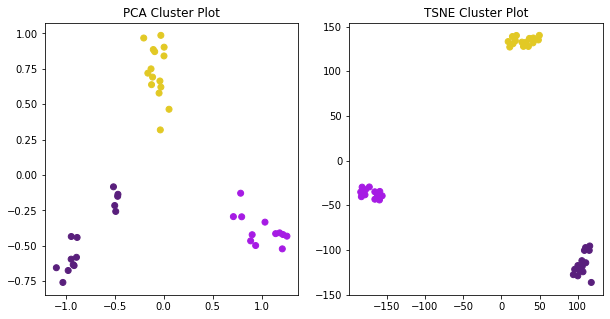

In [ ]:
from sklearn.cluster import KMeans
kmeans_cluster = KMeans(n_clusters=3, random_state=10).fit(X)
#, precompute_distances = True
print(kmeans_cluster.labels_)
print_clusters(kmeans_cluster.labels_, G, list(model.wv.vocab))
plot_TSNE_PCA_nodes(node_list = list(model.wv.vocab), X_embedding=X, annotate=True, annotate_labes=list_labels, labels=kmeans_cluster.labels_)

In Google kolab, you need to install a package for extra clustering, then the kmedoid clustering method will be used from this package, which is similar to the k-means method, but differs in the way cluster centers are selected and is suitable for all other distance metrics, including cosine distance.

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.3 MB/s 


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
[0.61813825, 0.9238494, 0.9151149, 0.83720547, 0.814246, 0.8312537, 0.793735, 0.63800716]


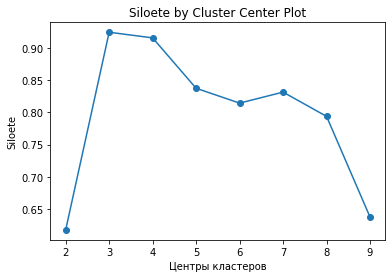

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn import metrics
#let's choose the optimal number of clusters by silhouette
iters_1 = range(2, 10, 1)
siloete_arr = []
for k in iters_1:
    kmedoids = KMedoids(n_clusters=k, random_state=14, metric='cosine').fit(X)
    siloete_arr.append(metrics.silhouette_score( metric="precomputed", X=CosDist,   labels=kmedoids.labels_ ))
    

    print('Fit {} clusters'.format(k))
    
f, ax = plt.subplots(1, 1)
ax.plot(iters_1, siloete_arr, marker='o')
ax.set_xlabel('Центры кластеров')
ax.set_xticks(iters_1)
ax.set_xticklabels(iters_1)
ax.set_ylabel('Siloete')
ax.set_title('Siloete by Cluster Center Plot')
####################
print (siloete_arr)


In [ ]:
# Используя метод kmedoid https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
# получите метки кластеров и выведете результат с использованием функции print_clusters и plot_TSNE_PCA_nodes
#kmedoids = KMedoids(n_clusters=7, random_state=14, metric='cosine').fit(X)
#kmedoids.labels_

[2 2 2 2 2 2 5 5 5 5 5 5 1 6 6 6 6 6 2 2 0 0 0 0 0 0 3 4 4 4 4 4 4 0 3 2 0
 0 3 3 3]
CLUSTER  0 -----------
Организатор 2 , id- 2
Активный-участник 7 , id- 34
Активный-участник 5 , id- 32
Активный-участник 3 , id- 30
Активный-участник 1 , id- 28
Активный-участник 2 , id- 29
Активный-участник 6 , id- 33
Активный-участник 9 , id- 36
Активный-участник 8 , id- 35
Неразмеченных - 0
ВСЕГО в кластере  - 9
CLUSTER  1 -----------
Тренер - группа любители, организатор 1 , id- 1
Неразмеченных - 0
ВСЕГО в кластере  - 1
CLUSTER  2 -----------
Главный тренер-группа pro , id- 0
Спортсмен-pro-4 , id- 8
Спортсмен-pro-6 , id- 10
Спортсмен-pro-3 , id- 7
Спортсмен-pro-5 , id- 9
Спортсмен-pro-1 , id- 5
Спортсмен-pro-2 , id- 6
Спортивный врач-физиотерапевт , id- 4
Организатор 3(Дох) , id- 3
Неразмеченных - 0
ВСЕГО в кластере  - 9
CLUSTER  3 -----------
Активный-участник 11 , id- 38
Активный-участник 13 , id- 40
Активный-участник 4 , id- 31
Активный-участник 12 , id- 39
Активный-участник 10 , id- 37
Неразмеч

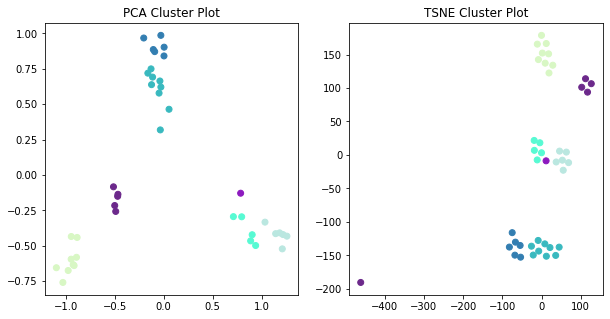

In [ ]:
from sklearn.cluster import KMeans
kmeans_cluster = KMeans(n_clusters=7, random_state=14).fit(X)
#, precompute_distances = True
print(kmeans_cluster.labels_)
print_clusters(kmeans_cluster.labels_, G, list(model.wv.vocab))
plot_TSNE_PCA_nodes(node_list = list(model.wv.vocab), X_embedding=X, annotate=True, annotate_labes=list_labels, labels=kmeans_cluster.labels_)


Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
[0.4241915, 0.16784775, 0.78394073, 0.76816905, 0.63185424, 0.6185055, 0.59288627, 0.56056225]


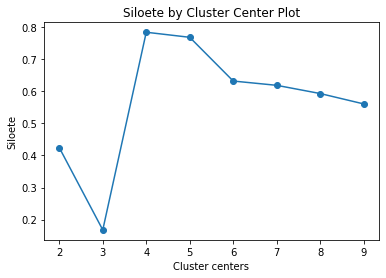

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn import metrics
#let's choose the optimal number of clusters by silhouette
iters_1 = range(2, 10, 1)
siloete_arr = []
for k in iters_1:
    kmedoids = KMedoids(n_clusters=k, random_state=14, metric='cosine').fit(X)
    siloete_arr.append(metrics.silhouette_score( metric="precomputed", X=CosDist,   labels=kmedoids.labels_ ))
    

    print('Fit {} clusters'.format(k))
    
f, ax = plt.subplots(1, 1)
ax.plot(iters_1, siloete_arr, marker='o')
ax.set_xlabel('Cluster centers')
ax.set_xticks(iters_1)
ax.set_xticklabels(iters_1)
ax.set_ylabel('Siloete')
ax.set_title('Siloete by Cluster Center Plot')
####################
print (siloete_arr)
#kmedoids.labels_

In [ ]:
#пример, как вызывать affinity 


#Affinity propagation use damping 0.7, cosine distance

#the contents of the clusters and a visual image
from sklearn.cluster import AffinityPropagation
ap_cluster = AffinityPropagation( damping=0.7, max_iter=100, affinity='precomputed').fit(CosDist)

In [ ]:
from sklearn import metrics
#silhouette
print ("Affinity silhouette", metrics.silhouette_score( metric="precomputed", X=CosDist,   labels = ap_cluster.labels_ ))


# ARI
print("ARI dbscan vs affinity propagation ", metrics.adjusted_rand_score(db.labels_, ap_cluster.labels_))

#AMI
print("AMI dbscan vs affinity propagation ",metrics.adjusted_mutual_info_score(db.labels_, ap_cluster.labels_))


Affinity silhouette 0.3473234
ARI dbscan vs affinity propagation  0.2667146801104309
AMI dbscan vs affinity propagation  0.27946800731862115


In [ ]:
import networkx
from google.colab import files
#загрузка файла
uploaded = files.upload()
# данные из файла преобразуются в граф
#G = networkx.readwrite.graphml.read_graphml("input_graph_anonimized.graphml")
G = networkx.readwrite.graphml.read_graphml("Filtered_graph.graphml")

Saving Filtered_graph.graphml to Filtered_graph (1).graphml


In [ ]:
#идентификаторы узлов должны быть целыми для использования библиотека, а тут строки, поэтому делается конвертация
G1 = networkx.relabel.convert_node_labels_to_integers(G, first_label=0, ordering='default')
G1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40))

In [ ]:
!pip install karateclub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 1.8 MB 44.2 MB/s 
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
     |████████████████████████████████| 170 kB 53.9 MB/s 
     |████████████████████████████████| 2.2 MB 44.4 MB/s 
  Created wheel for karateclub: filename=karateclub-1.3.2-py3-none-any.whl size=99091 sha256=762cdd10f7266c449fdf2d77931a32a66084c22dc397bfe49ac1c53dd33f7003
  Stored in directory: /root/.cache/pip/wheels/6c/56/60/90b1d642c510370d800bb81d4883e92023c45e3b7ca19cf1af
Successfully built karateclub
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from karateclub import DeepWalk

#дип валк - эмбединг с рекомендованными параметрами
model = DeepWalk(walk_length=80, dimensions=100, window_size=10)
model.fit(G1)
embed = model.get_embedding()
print('векторное представление узлов', embed) # вывод векторов
print('весь список узлов', list(G1.nodes)) #сами узлы

TypeError: ignored

In [ ]:
from scipy.spatial.distance import cdist
import numpy as np

M = 1 - cdist(embed, embed, metric='cosine')
print (M.shape)
# это матрица схожести.
# Теперь для того, чтобы найти 10 наиболее похожих на 1ый узел нужно найти 10 самых больших значений. Чем ближе к 1 тем больше схожесть, чем меньше, тем меньше.

# выбираем 1ую строку - это схожесть всех узлов с 1ым.
print (M[0,:])

# смотрим 4 самых похожих
temp = np.argpartition(-M[0,:], 10)
result_args = temp[:10]
print (result_args)


NameError: ignored

In [ ]:
#пример, чтобы понять как работает то, что выше

import numpy as np

test = np.array([9,1,3,4,8,7,2,5,6,0])

temp = np.argpartition(-test, 4)
result_args = temp[:4]
print (result_args)

temp = np.partition(-test, 4)
result = -temp[:4]
print (result)

[0 4 8 5]
[9 8 6 7]


In [ ]:
# это функции для визуализации . 

from random import randint
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#labels - метки кластера
#word_list - идентификаторы узлов графа
#annotate - выводить ли подписи названий узлов на график
def plot_PCA_nodes(G1, X_scaled, nodes_list,  labels = [],annotate = False , random_st=10):
    
    X = X_scaled
    colors = ['#6495ED' for i in nodes_list]
    map={}
    if len(labels) != 0:
       for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
       colors = [map[i] for i in labels]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1],  c=colors)
    for i, node in enumerate(nodes_list):
        if (G1.nodes[ node ]['label'] !='-' and annotate==True):
           plt.annotate(G1.nodes[ node ]['label'], xy=(result[i, 0], result[i, 1]))
    
    plt.show()
   


    
    

def plot_TSNE_nodes(G1, X_scaled, nodes_list, labels = [], annotate = False, random_st=10):

    colors = ['#6495ED' for i in nodes_list]
    map={}
    if len(labels) != 0:
      for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
      colors = [map[i] for i in labels]

    X = X_scaled


    tsne = TSNE(n_components=2, verbose=0, perplexity=7, n_iter=150,  init='random', random_state=random_st)
    tsne_results = tsne.fit_transform(X)
    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c = colors)
    for i, node in enumerate(nodes_list):
        if (G1.nodes[node]['label'] !='-' and annotate ==True):
          plt.annotate(G1.nodes[node]['label'], xy=(tsne_results[i, 0], tsne_results[i, 1]))
    plt.show()


def plot_TSNE_PCA_nodes(G1, x_scaled, nodes_list, labels = [], annotate = False, random_st=10):

    colors = ['#6495ED' for i in nodes_list]
    map={}
    if len(labels) != 0:
      for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
      colors = [map[i] for i in labels]


    X = X_scaled

    tsne = TSNE(n_components=2, verbose=0, perplexity=7,   learning_rate="auto",  init='pca', random_state=random_st)
    tsne_results = tsne.fit_transform(X)

    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(X)
    
    f, ax = plt.subplots(1, 2, figsize=(40, 20))
    ax[0].scatter(pca_results[:, 0], pca_results[:, 1],  c=colors)
    ax[0].set_title('PCA Cluster Plot')
    
    
  

    ax[1].scatter(tsne_results[:, 0], tsne_results[:, 1], c = colors)
    ax[1].set_title('TSNE Cluster Plot')

    for i, node in enumerate(nodes_list):
        if (G1.nodes[node]['label'] !='-' and annotate ==True):
          ax[0].annotate(G1.nodes[node]['label'], xy=(pca_results[i, 0], pca_results[i, 1]))
          ax[1].annotate(G1.nodes[node]['label'], xy=(tsne_results[i, 0], tsne_results[i, 1]))
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


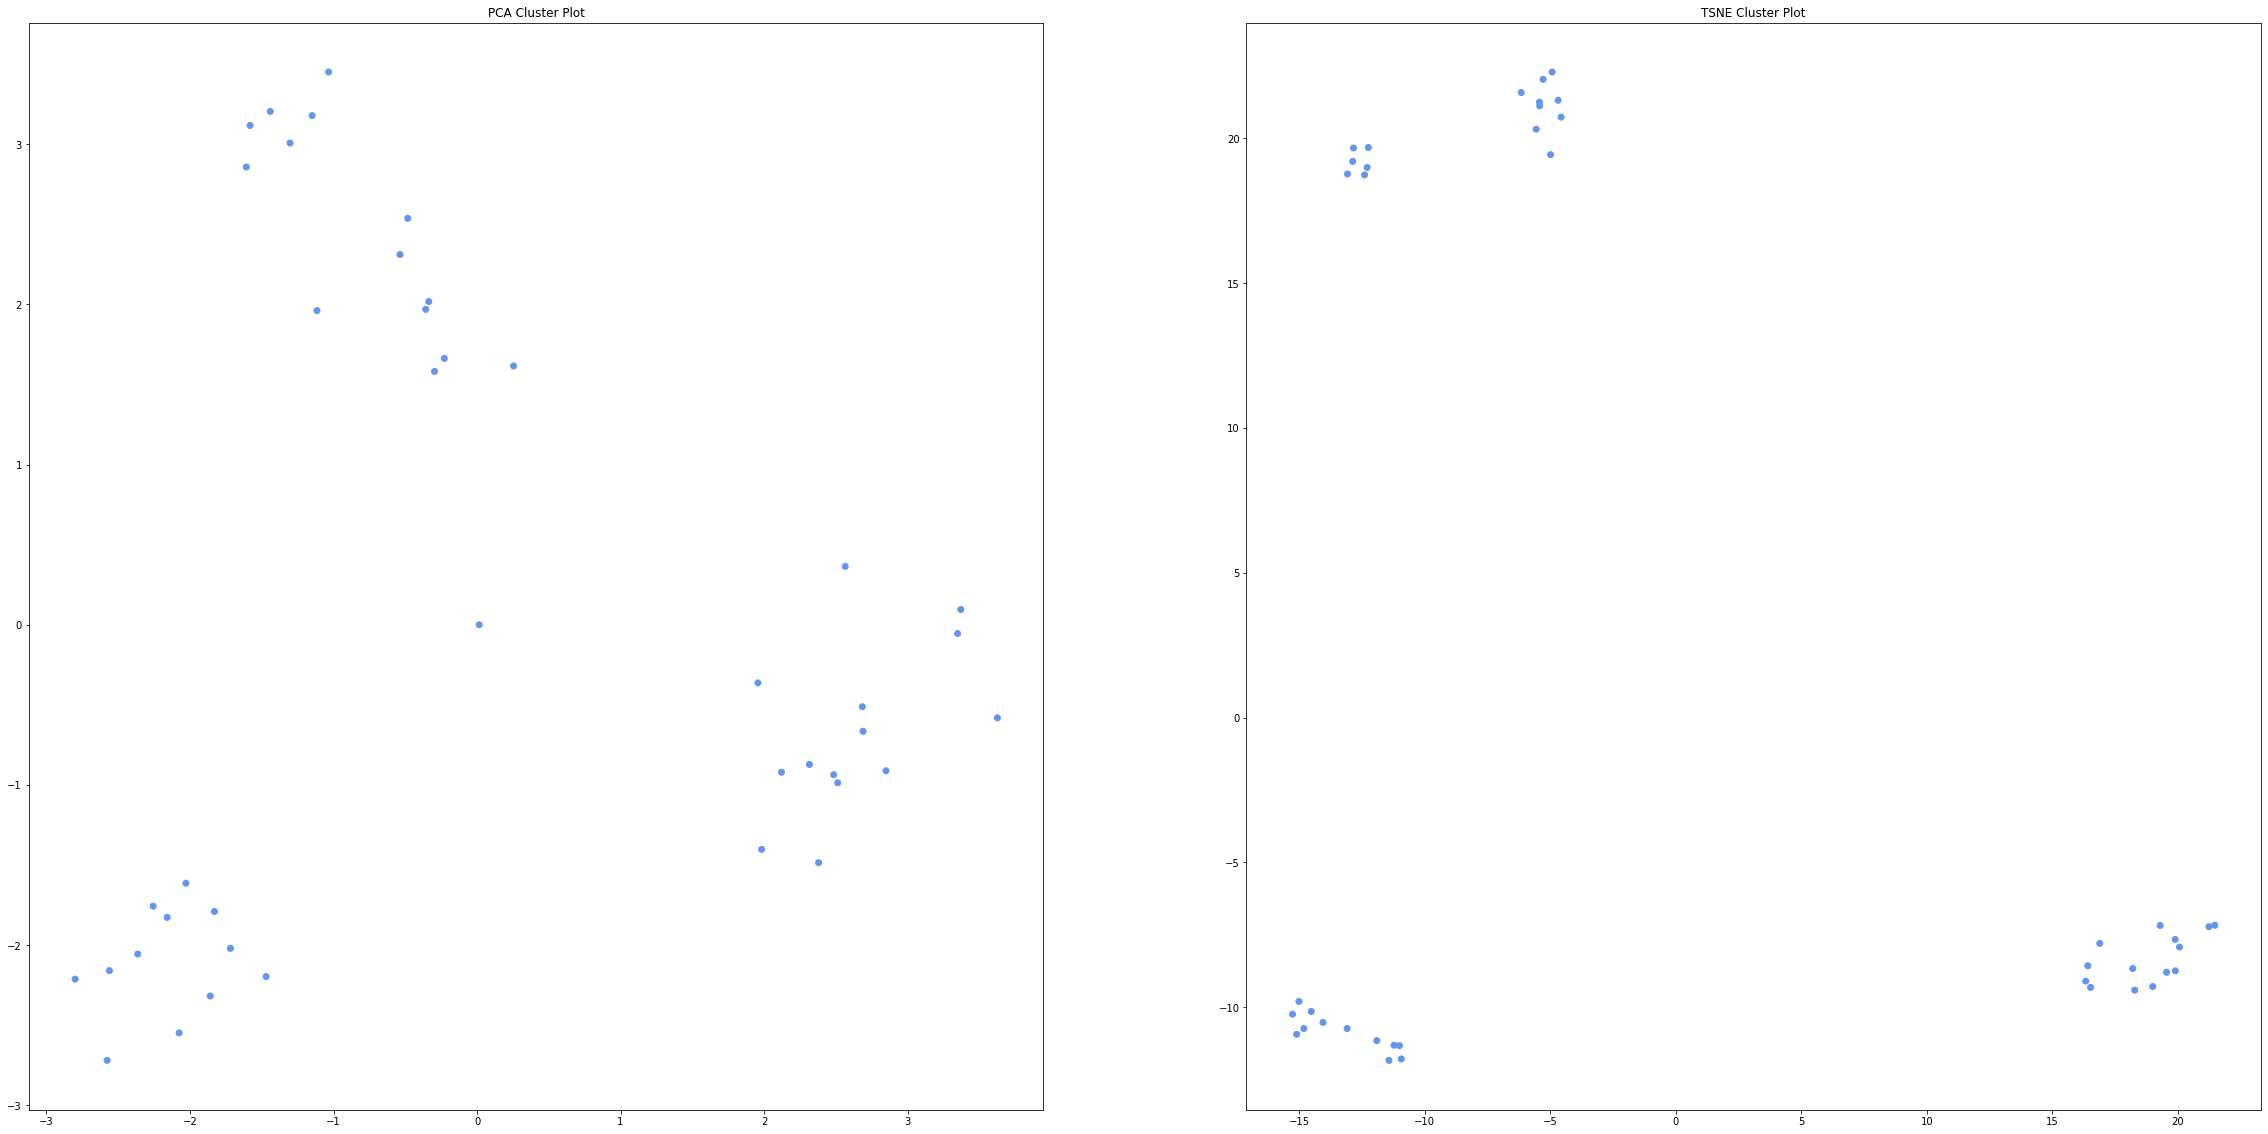

In [ ]:
X = embed

X_scaled = X


#plot_PCA_nodes(G1, X_scaled, list(G1.nodes), labels = [], annotate = False, random_st=15)

plot_TSNE_PCA_nodes(G1,X_scaled, list(G1.nodes), labels = [], annotate = False, random_st=15)